In [184]:
from __future__ import annotations
from tqdm import tqdm
from dataclasses import dataclass
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

with open('data.txt') as file:
    data = file.read().splitlines()

In [163]:
numbers = {}
left = []

for line in data:
    var, exp = line.split(':')
    
    if exp.strip().isnumeric():
        numbers[var] = int(exp)
    else:
        first, op, scnd = exp.split()
        left.append((var, (first, op, scnd)))


while len(left) > 0:
    var, exp = left.pop(0)

    if exp[0] in numbers.keys() and exp[2] in numbers.keys():
        match exp[1]:
            case '+':
                numbers[var] = numbers[exp[0]] + numbers[exp[2]]
            case '-':
                numbers[var] = numbers[exp[0]] - numbers[exp[2]]
            case '*':
                numbers[var] = numbers[exp[0]] * numbers[exp[2]]
            case '/':
                numbers[var] = numbers[exp[0]] / numbers[exp[2]]
    
    else:
        left.append((var, exp))

In [164]:
exps = {}
left = []

for line in data:
    var, exp = line.split(':')

    if var == 'humn':
        exps[var] = "HUMN"
    elif exp.strip().isnumeric():
        exps[var] = int(exp)
    else:
        first, op, scnd = exp.split()
        exps[var] = (first, op, scnd)

In [165]:
def replace(exps, root):
    if isinstance(root, tuple):
        new_tuple = []
        for a in root:
            new_tuple.append(replace(exps, a))
        return tuple(new_tuple)
    elif isinstance(root, str):
        if root in ['-', '+', '*', '/']:
            return root
        elif root == "HUMN":
            return root
        else:
            return replace(exps, exps[root])
    else:
        return root

def eval_expression(exp, humn_replace=None):
    if isinstance(exp, tuple):
        match exp[1]:
            case '+':
                return eval_expression(exp[0], humn_replace) + eval_expression(exp[2], humn_replace)
            case '-':
                return eval_expression(exp[0], humn_replace) - eval_expression(exp[2], humn_replace)
            case '*':
                return eval_expression(exp[0], humn_replace) * eval_expression(exp[2], humn_replace)
            case '/':
                return eval_expression(exp[0], humn_replace) / eval_expression(exp[2], humn_replace)
    elif isinstance(exp, int):
        return exp
    else:
        return humn_replace

lhs = replace(exps, exps['root'][0])
rhs = replace(exps, exps['root'][2])

100%|██████████| 15/15 [00:00<00:00, 4122.03it/s]


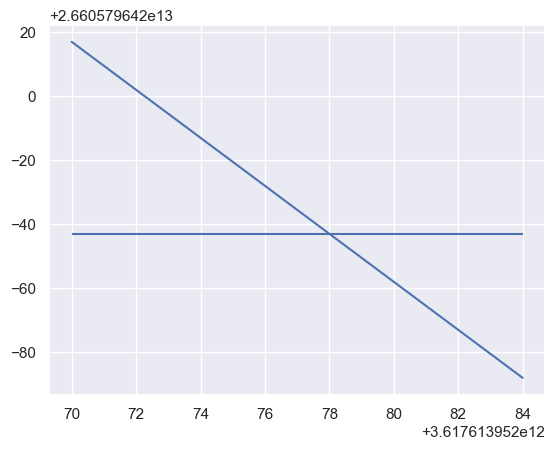

In [251]:
outputs = []
x = np.arange(3617613952370, 3617613952385, 1)

for n in tqdm(x):
    outputs.append(eval_expression(lhs, n))

plt.plot(x, outputs)
plt.hlines(eval_expression(rhs), min(x), max(x))

In [189]:
len(x)

2000